# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [5]:
import pandas as pd
import matplotlib.pyplot as plt 

In [17]:
df = pd.read_excel('indexes.xlsx',index_col=0, sheet_name=2)
df.drop(index=df.index[0], 
        axis=0, 
        inplace=True)

In [18]:
df.head()

,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
1995-01-01,91449,50460.2,93284.5,64958.1,71306.6,81671.5,120933,69158.2,79885.9,72514.7,...,43958.5,44803.4,45544.5,48527.5,56701.6,74435.8,64018.9,54705.2,NaN,53202.8
1995-02-01,82202.8,51085.8,93190.2,64787.9,72022.3,81657.6,119509,68951.1,80897.1,73155.2,...,43925.4,44528.8,46051.6,49341.3,56593.6,72777.9,63715,54356.1,NaN,53096.2
1995-03-01,79120.7,51269,92247.5,64367.5,72015.8,81449.3,120282,68712.4,81379.9,72190.4,...,44434.9,45200.5,45383.8,49442.2,56171.2,73896.8,64113.6,53583.1,NaN,53201.3
1995-04-01,77101.2,53133.5,90762.9,64277.7,72965.6,81124.4,120098,68610,82188.9,71442.9,...,44267.8,45614.3,46124.2,49455.9,56567.9,74455.3,64623.2,54786,NaN,53590.9
1995-05-01,84409.1,53042.2,90258,63997.1,73704,81542.6,119929,68844.9,82077.1,70630.8,...,44223.6,44831,45878,50369.7,56479.8,75432,64530.4,54698.8,NaN,53678.2


<AxesSubplot:>

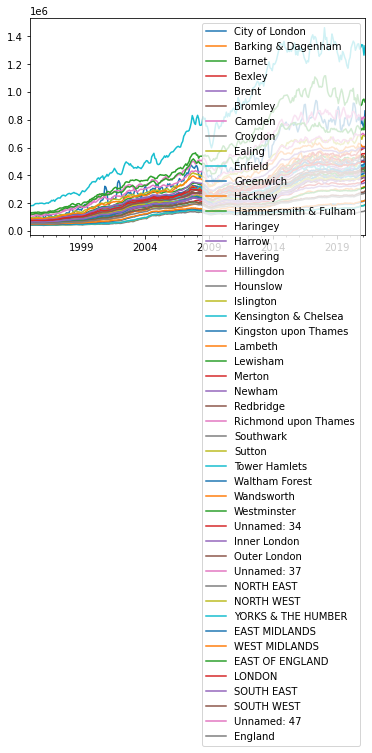

In [19]:
df.plot()

In [20]:
df.index.dtype

dtype('<M8[ns]')

# Step 2: Data Preprocessing

In [ ]:
def get_datetimes(df):
    """
    Takes a dataframe:
    returns only those column names that can be converted into datetime objects 
    as datetime objects.
    NOTE number of returned columns may not match total number of columns in passed dataframe
    """
    
    return pd.to_datetime(df.columns.values[1:], format='%Y-%m')

# Step 3: EDA and Visualization

In [ ]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

# Step 4: Reshape from Wide to Long Format

In [ ]:
def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

# Step 5: ARIMA Modeling

# Step 6: Interpreting Results

In [7]:
df2 = pd.read_csv('2016_2021.csv')
df2.head()

,unique_id,price_paid,deed_date,postcode,property_type,new_build,estate_type,saon,paon,street,locality,town,district,county,transaction_category,linked_data,Unnamed: 16,Unnamed: 17
0,8A78B2AF-785C-5CB0-E053-6B04A8C0F504,140000,24/05/2019,E1 0AD,F,N,L,FLAT 6,"BILL FAUST HOUSE, 20",TARLING STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...,NaN,NaN
1,B0A9D11B-5E60-4C1F-E053-6C04A8C0D716,325000,13/08/2020,E1 0AD,F,N,L,FLAT 8,"BILL FAUST HOUSE, 20",TARLING STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...,NaN,NaN
2,8355F008-E752-55C5-E053-6B04A8C0D090,176000,06/12/2018,E1 0AD,F,N,L,FLAT 5,"ADAM MEERE HOUSE, 24",TARLING STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...,NaN,NaN
3,4E95D758-19CD-EDA1-E050-A8C0630539E2,450000,31/03/2017,E1 0AE,F,N,L,NaN,296,CABLE STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,B,http://landregistry.data.gov.uk/data/ppi/trans...,NaN,NaN
4,5376B385-4F7D-34C1-E053-6B04A8C09FF6,440000,23/05/2017,E1 0AE,F,N,L,NaN,314,CABLE STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...,NaN,NaN


In [8]:
df2[['zip','Last']] = df2.postcode.str.split(" ",expand=True,)
df2.head()

,unique_id,price_paid,deed_date,postcode,property_type,new_build,estate_type,saon,paon,street,locality,town,district,county,transaction_category,linked_data,Unnamed: 16,Unnamed: 17,zip,Last
0,8A78B2AF-785C-5CB0-E053-6B04A8C0F504,140000,24/05/2019,E1 0AD,F,N,L,FLAT 6,"BILL FAUST HOUSE, 20",TARLING STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...,NaN,NaN,E1,0AD
1,B0A9D11B-5E60-4C1F-E053-6C04A8C0D716,325000,13/08/2020,E1 0AD,F,N,L,FLAT 8,"BILL FAUST HOUSE, 20",TARLING STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...,NaN,NaN,E1,0AD
2,8355F008-E752-55C5-E053-6B04A8C0D090,176000,06/12/2018,E1 0AD,F,N,L,FLAT 5,"ADAM MEERE HOUSE, 24",TARLING STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...,NaN,NaN,E1,0AD
3,4E95D758-19CD-EDA1-E050-A8C0630539E2,450000,31/03/2017,E1 0AE,F,N,L,NaN,296,CABLE STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,B,http://landregistry.data.gov.uk/data/ppi/trans...,NaN,NaN,E1,0AE
4,5376B385-4F7D-34C1-E053-6B04A8C09FF6,440000,23/05/2017,E1 0AE,F,N,L,NaN,314,CABLE STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...,NaN,NaN,E1,0AE


In [9]:
df2.deed_date.dtype

dtype('O')

In [19]:
df2['Month'] = pd.DatetimeIndex(df2['deed_date'])
df2['month_year'] = pd.to_datetime(df2['Month']).dt.to_period('M')

In [29]:
grouped_multiple = df2.groupby(['district', 'zip', 'month_year']).agg({'price_paid': ['mean', 'min', 'max', percentile(10), percentile(90)]})

In [32]:
grouped_multiple.tail(25)

shift - baseline model 
prediction just on indogenous data for one borough
non dynamic predict vs random walk
dynamic predict
1 year
experiment with differencing to see which will give best stationarity
interpolate between missing months
forward interpolation - no data leakage.
pandas.dataframe.interpolate method

price_paid                                  \
                                   mean     min       max percentile_10   
district   zip month_year                                                 
WANDSWORTH SW8 2019-06     6.343750e+05  562500    785000      570750.0   
               2019-07     5.990000e+05  236500    935000      335750.0   
               2019-08     5.742944e+05  148000    795000      424250.0   
               2019-09     5.995000e+05  355000    917000      395000.0   
               2019-10     7.065238e+05  390000   1045000      410900.0   
               2019-11     2.521246e+06  302000  36160125      394000.0   
               2019-12     6.591586e+05  325220    915000      431400.0   
               2020-01     5.822222e+05  350000   1000000      350000.0   
               2020-02     5.172273e+05   32000   1110000      175000.0   
               2020-03     8.119000e+05  200000   2750000      250350.0   
               2020-04     1.234167e+06  500000   4550000      530000.0   
               2020-05     4.871250e+05  328500    645000      357450.0   
               2020-06     6.539167e+05  500000   1030000      529250.0   
               2020-07     6.149286e+05  350000    930000      414500.0   
               2020-08     5.570000e+05   14000   1250000      230600.0   
               2020-09     6.654000e+05  347000    925000      404200.0   
               2020-10     5.884091e+05  325000    955000      408500.0   
               2020-11     6.900000e+05  347000   1200000      389600.0   
               2020-12     9.336667e+05  370000   2700000      455000.0   
               2021-01     6.225000e+05  535000    698000      559000.0   
               2021-02     6.362500e+05  450000    965000      459000.0   
               2021-03     4.906250e+05  356250    625000      383125.0   
               2021-04     6.350000e+05  620000    650000      623000.0   
               2021-05     7.175000e+05  715000    720000      715500.0   
               2021-12     5.590000e+05  559000    559000      559000.0   

                                         
                          percentile_90  
district   zip month_year                
WANDSWORTH SW8 2019-06         729500.0  
               2019-07         907500.0  
               2019-08         751950.0  
               2019-09         838500.0  
               2019-10         949500.0  
               2019-11         947413.0  
               2019-12         865500.0  
               2020-01         908000.0  
               2020-02        1000000.0  
               2020-03        1046000.0  
               2020-04        2605000.0  
               2020-05         616500.0  
               2020-06         847500.0  
               2020-07         852000.0  
               2020-08         992000.0  
               2020-09         875000.0  
               2020-10         920000.0  
               2020-11        1071000.0  
               2020-12        1727500.0  
               2021-01         681200.0  
               2021-02         870500.0  
               2021-03         598125.0  
               2021-04         647000.0  
               2021-05         719500.0  
               2021-12         559000.0

In [4]:
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

In [3]:
import numpy as np

# Import the Data

As the datasets were so large, it took time to download and the website would regularly time out when trying to run large queries. As a result I downloaded the data in time segments. I will now put them all together.

In [6]:
df2000_2002 = pd.read_csv('2000_2002.csv')
df2002_2006 = pd.read_csv('2002_2006.csv')
df2006_2011 = pd.read_csv('2006_2011.csv')
df2011_2016 = pd.read_csv('2011_2016.csv')
df2016_2021 = pd.read_csv('2016_2021.csv')

create a list of the dfs, this may be useful to explore the datasets and ensure I can append them.

In [7]:
dfs = [df2016_2021, df2011_2016, df2006_2011, df2002_2006, df2000_2002]

for df in dfs:
    print(df.shape)

(338887, 16)
(340644, 16)
(350267, 16)
(367691, 16)
(192195, 16)


great, it looks like there are equal number of columns in each dataframe, this should make adding them together relatively simple. 

In [46]:
df2002_2006.head()

,unique_id,price_paid,deed_date,postcode,property_type,new_build,estate_type,saon,paon,street,locality,town,district,county,transaction_category,linked_data
0,3A04074C-AC1A-46D7-BD91-FBF7501BAD44,173500,28/10/2004,E1 0AE,F,N,L,NaN,324,CABLE STREET,LONDON,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
1,262FFF4F-0AFC-469E-9C41-BC09FE43F210,171000,16/08/2005,E1 0AE,F,N,L,NaN,326,CABLE STREET,LONDON,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
2,D3B8DD42-1C71-4551-ACB9-A4C04126AEE7,177000,25/10/2004,E1 0AE,F,N,L,NaN,330,CABLE STREET,LONDON,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
3,6DA08449-D140-30F2-E053-6B04A8C05F3B,157500,06/02/2003,E1 0AE,F,N,L,NaN,332,CABLE STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
4,261DD75C-2E11-46D7-83AF-C35B100F1B4E,169000,01/07/2004,E1 0AE,F,N,L,NaN,340,CABLE STREET,LONDON,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...


In [47]:
df2006_2011.head()

,unique_id,price_paid,deed_date,postcode,property_type,new_build,estate_type,saon,paon,street,locality,town,district,county,transaction_category,linked_data
0,DF33AD88-E093-4796-B42C-9A10B910D743,115500,16/03/2007,E1 0AD,F,Y,L,FLAT 4,"BILL FAUST HOUSE, 20",TARLING STREET,LONDON,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
1,00E7F6C2-3F26-4123-8475-FA697F239A09,105000,16/03/2007,E1 0AD,F,Y,L,FLAT 5,"BILL FAUST HOUSE, 20",TARLING STREET,LONDON,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
2,8A87041C-93CB-497A-B8E6-56FFEE2552E3,102000,12/03/2007,E1 0AD,F,Y,L,FLAT 8,"BILL FAUST HOUSE, 20",TARLING STREET,LONDON,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
3,35CDF0A7-1550-4555-801A-46DDC0B7171A,150000,11/05/2007,E1 0AD,F,Y,L,FLAT 9,"BILL FAUST HOUSE, 20",TARLING STREET,LONDON,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
4,9021C9C5-FCCD-4203-B43A-2E8BDBA322E0,97500,15/03/2007,E1 0AD,F,N,L,FLAT 1,"ADAM MEERE HOUSE, 24",TARLING STREET,LONDON,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...


In [49]:
df2011_2016.head()

,unique_id,price_paid,deed_date,postcode,property_type,new_build,estate_type,saon,paon,street,locality,town,district,county,transaction_category,linked_data
0,CFC960FB-CFB4-4CFB-BDF5-138EF6ECB21B,129500,27/05/2011,E1 0AD,F,N,L,FLAT 4,"BILL FAUST HOUSE, 20",TARLING STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
1,6ADB7B46-76D2-4FB8-BA12-DEEECB58CEB2,270000,08/07/2014,E1 0AD,F,N,L,FLAT 8,"BILL FAUST HOUSE, 20",TARLING STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
2,4123F148-7A6C-4A7D-BBBF-739540D9F688,210000,01/12/2011,E1 0AD,F,N,L,FLAT 8,"ADAM MEERE HOUSE, 24",TARLING STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
3,2479F407-6623-4468-B4EE-436C7F00E0C7,250000,17/06/2011,E1 0AD,F,N,L,FLAT 9,"ADAM MEERE HOUSE, 24",TARLING STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
4,1570B1D0-C6DD-4B0C-9645-2B3D3A934C8C,249995,29/06/2012,E1 0AE,F,N,L,NaN,296,CABLE STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...


In [50]:
df2016_2021.head()

,unique_id,price_paid,deed_date,postcode,property_type,new_build,estate_type,saon,paon,street,locality,town,district,county,transaction_category,linked_data
0,8A78B2AF-785C-5CB0-E053-6B04A8C0F504,140000,24/05/2019,E1 0AD,F,N,L,FLAT 6,"BILL FAUST HOUSE, 20",TARLING STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
1,B0A9D11B-5E60-4C1F-E053-6C04A8C0D716,325000,13/08/2020,E1 0AD,F,N,L,FLAT 8,"BILL FAUST HOUSE, 20",TARLING STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
2,8355F008-E752-55C5-E053-6B04A8C0D090,176000,06/12/2018,E1 0AD,F,N,L,FLAT 5,"ADAM MEERE HOUSE, 24",TARLING STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
3,4E95D758-19CD-EDA1-E050-A8C0630539E2,450000,31/03/2017,E1 0AE,F,N,L,NaN,296,CABLE STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,B,http://landregistry.data.gov.uk/data/ppi/trans...
4,5376B385-4F7D-34C1-E053-6B04A8C09FF6,440000,23/05/2017,E1 0AE,F,N,L,NaN,314,CABLE STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...


In [51]:
df2000_2002.head()

,unique_id,price_paid,deed_date,postcode,property_type,new_build,estate_type,saon,paon,street,locality,town,district,county,transaction_category,linked_data
0,10BACA68-F56C-47CE-906B-4D9CD4FEF39A,123000,27/01/2000,E1 0AF,F,N,L,NaN,408,CABLE STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
1,F6339A0D-34F8-44DD-AC6B-AE266FC884EE,80000,28/09/2001,E1 0AJ,F,N,L,FLAT 8,DONOVAN HOUSE,CABLE STREET,LONDON,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
2,73441E21-34A6-444A-B5DA-310A673CC3F6,60000,21/06/2000,E1 0AR,F,N,L,FLAT 12,MOORE HOUSE,CABLE STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
3,1C1202B4-E202-45B7-B7B3-BFA7A1A1E05B,61000,18/02/2000,E1 0AU,F,N,L,FLAT 29,GOSLING HOUSE,SUTTON STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
4,B81AB99F-86F1-4E82-8622-1F26359BD594,73500,12/04/2001,E1 0AZ,F,N,L,FLAT 32,FOLEY HOUSE,TARLING STREET,LONDON,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...


all the columns are the same, these dataframes can just be appended. 

In [8]:
new = df2000_2002.append(df2002_2006)
new = new.append(df2006_2011)
new = new.append(df2011_2016)
new = new.append(df2016_2021)
new.head()

,unique_id,price_paid,deed_date,postcode,property_type,new_build,estate_type,saon,paon,street,locality,town,district,county,transaction_category,linked_data
0,10BACA68-F56C-47CE-906B-4D9CD4FEF39A,123000,27/01/2000,E1 0AF,F,N,L,NaN,408,CABLE STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
1,F6339A0D-34F8-44DD-AC6B-AE266FC884EE,80000,28/09/2001,E1 0AJ,F,N,L,FLAT 8,DONOVAN HOUSE,CABLE STREET,LONDON,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
2,73441E21-34A6-444A-B5DA-310A673CC3F6,60000,21/06/2000,E1 0AR,F,N,L,FLAT 12,MOORE HOUSE,CABLE STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
3,1C1202B4-E202-45B7-B7B3-BFA7A1A1E05B,61000,18/02/2000,E1 0AU,F,N,L,FLAT 29,GOSLING HOUSE,SUTTON STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
4,B81AB99F-86F1-4E82-8622-1F26359BD594,73500,12/04/2001,E1 0AZ,F,N,L,FLAT 32,FOLEY HOUSE,TARLING STREET,LONDON,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...


In [9]:
new.shape

(1589684, 16)

This has been successful, I will now continue with data cleaning and inspection, first though, a description of what these features mean and are they important i.e can I drop them now?

 - unique_id: this is just the id number for the transaction
 - price_paid: In Pound Sterling
 - deed_date: date of completion
 - property_type: detached, semi-detached, terraced or flat maissonette
 - new_build: yes or no
 - estate_type: leasehold or freehold
 - saon: secondary addressable object name, if there is a building that is subdivided into flats for example, there will be an saon.
 - paon: primary addressable object name (typically the house number or name)
 - street: street name
 - locality: in this instance will be London
 - town: if applicable, more granular detail than London could be given
 - district: should represent the Borough.
 - county: greater london in this project
 - transaction_category: standard or additional
 - linked_data: url to transaction information

It looks like many of these columns can be dropped as they will not be particularly useful and the information is often provided in another feature. For example locality and town are similar. Before dropping, I will check for duplicates and null values

In [10]:
for col in new.columns:
    print(col)
    print(new[col].isna().sum())

unique_id
0
price_paid
0
deed_date
0
postcode
3968
property_type
0
new_build
0
estate_type
0
saon
892587
paon
18
street
858
locality
895989
town
0
district
0
county
0
transaction_category
0
linked_data
0


Since I want to ensure I have captured all of the Boroughs, I will do some EDA on this feature now. 

<AxesSubplot:title={'center':'Quantity House Sales by Borough since January 2000'}>

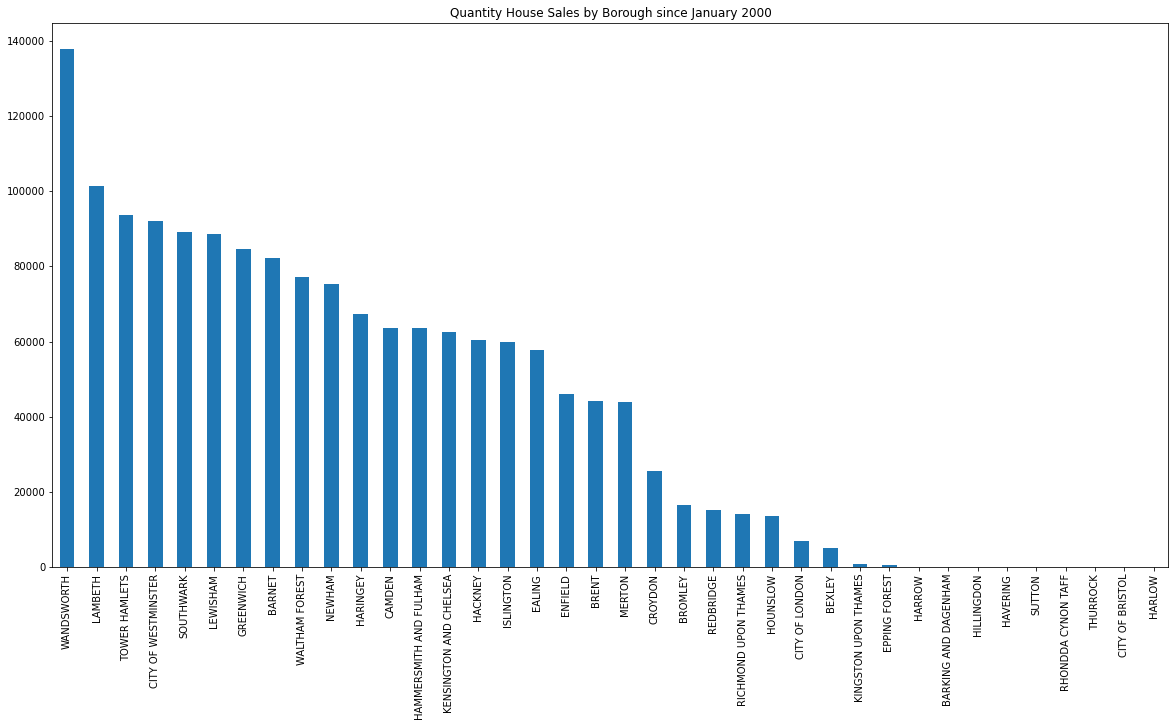

In [11]:
plt.figure(figsize=(20,10))
new['district'].value_counts().plot(kind='bar', title='Quantity House Sales by Borough since January 2000')

It appears that there are some Boroughs that have not been well captured by my initial search. I will run another query for these Boroughs separately and append this data. It is important to capture as much data as possible, but if there is sufficient data for a given Borough I will not re-run the query for it indivually (i.e Wandsworth) 

Another thing, are all of these actually Boroughs of London? No.

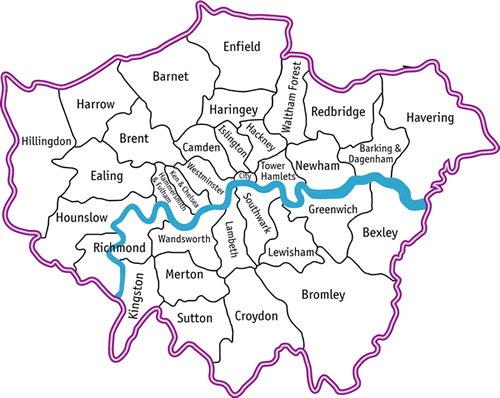

There are 32 local authority boroughs in London, plus the City of London which provides the same services as a Borough but to a much smaller area. For the purposes of this project, I will be treating the City of London as a Borough.

In [12]:
boroughs = [
        'Barking and Dagenham', 'Barnet', 'Bexley', 'Brent',
        'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich',
        'Hackney', 'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering',
        'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
        'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham',
        'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
        'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster', 'City of London'
    ]

for i in range(len(boroughs)):
    boroughs[i] = boroughs[i].lower()

boroughs


['barking and dagenham',
 'barnet',
 'bexley',
 'brent',
 'bromley',
 'camden',
 'croydon',
 'ealing',
 'enfield',
 'greenwich',
 'hackney',
 'hammersmith and fulham',
 'haringey',
 'harrow',
 'havering',
 'hillingdon',
 'hounslow',
 'islington',
 'kensington and chelsea',
 'kingston upon thames',
 'lambeth',
 'lewisham',
 'merton',
 'newham',
 'redbridge',
 'richmond upon thames',
 'southwark',
 'sutton',
 'tower hamlets',
 'waltham forest',
 'wandsworth',
 'westminster',
 'city of london']

In [13]:
for i in new['district'].unique():
    i = i.lower()
    if i not in boroughs:
        print(i)

epping forest
city of westminster
thurrock
rhondda cynon taff
harlow
city of bristol


In [14]:
# change the name of city of westminster to westminster
new['district'] = new['district'].replace('CITY OF WESTMINSTER', 'WESTMINSTER')

In [15]:
not_boroughs = []
for i in new['district'].unique():
    
    i = i.lower()
    if i not in boroughs:
        not_boroughs.append(i.upper())
        print(i)

epping forest
thurrock
rhondda cynon taff
harlow
city of bristol


In [16]:
not_boroughs

['EPPING FOREST',
 'THURROCK',
 'RHONDDA CYNON TAFF',
 'HARLOW',
 'CITY OF BRISTOL']

I will delete these entries from the dataset.

In [17]:
# remove rows with district values that are not boroughs
new = new[~new['district'].isin(not_boroughs)]



In [18]:
for i in new['district'].unique():
    i = i.lower()
    if i not in boroughs:
        print(i)

<AxesSubplot:title={'center':'Quantity House Sales by Borough since January 2000'}>

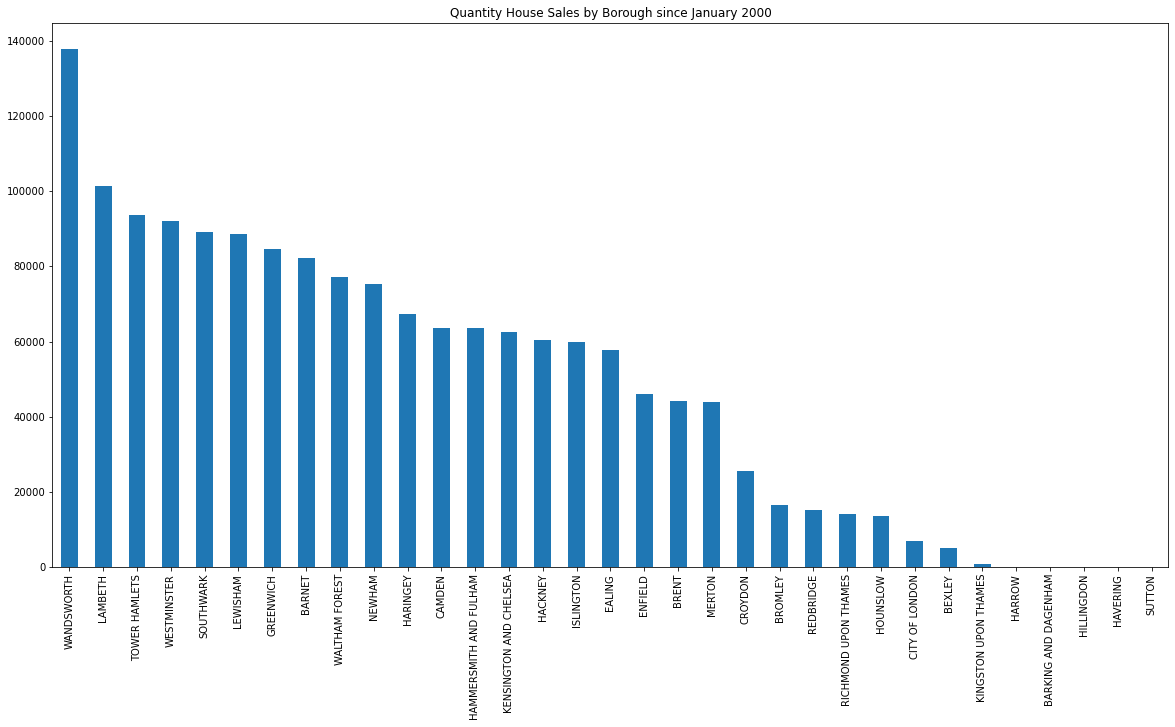

In [19]:
# I will now review the counts again, see where this dataset stands
plt.figure(figsize=(20,10))
new['district'].value_counts().plot(kind='bar', title='Quantity House Sales by Borough since January 2000')

In [20]:
len(new['district'].value_counts())

33

There is now all the boroughs there but some of them are poorly represented, I don't believe this is an accurate reflection of house sales in these boroughs so I will run separate queries for these and append the data to the new dataframe.

In [21]:
barking_df = pd.read_csv('barking.csv')
bexley_df = pd.read_csv('bexley.csv')
bromley_df = pd.read_csv('bromley.csv')
croydon_df = pd.read_csv('croydon.csv')
harrow_df = pd.read_csv('harrow_00_21.csv')
havering_df = pd.read_csv('havering.csv')
kingston_df = pd.read_csv('kingston.csv')
hillingdon_df = pd.read_csv('hillingdon.csv')
redbridge_df = pd.read_csv('redbridge.csv')
richmond_df = pd.read_csv('richmond.csv')
sutton_df = pd.read_csv('sutton.csv')
hounslow_df = pd.read_csv('hounslow.csv')

I will now append all this data to the existing dataframe and then remove duplicates

In [131]:
new.shape

(1589285, 16)

In [22]:
#create a list of dfs to make appending simple.
dfs_to_append = [barking_df, bexley_df, bromley_df, croydon_df, harrow_df, havering_df, kingston_df, hillingdon_df, redbridge_df, richmond_df, sutton_df, hounslow_df]

for i in dfs_to_append:
    new = new.append(i)

new.shape


(2585998, 16)

In [23]:
new.duplicated(subset='unique_id').sum()

90478

In [24]:
new.drop_duplicates(subset=['unique_id'], keep='last', inplace=True)

<AxesSubplot:title={'center':'Quantity House Sales by Borough since January 2000'}>

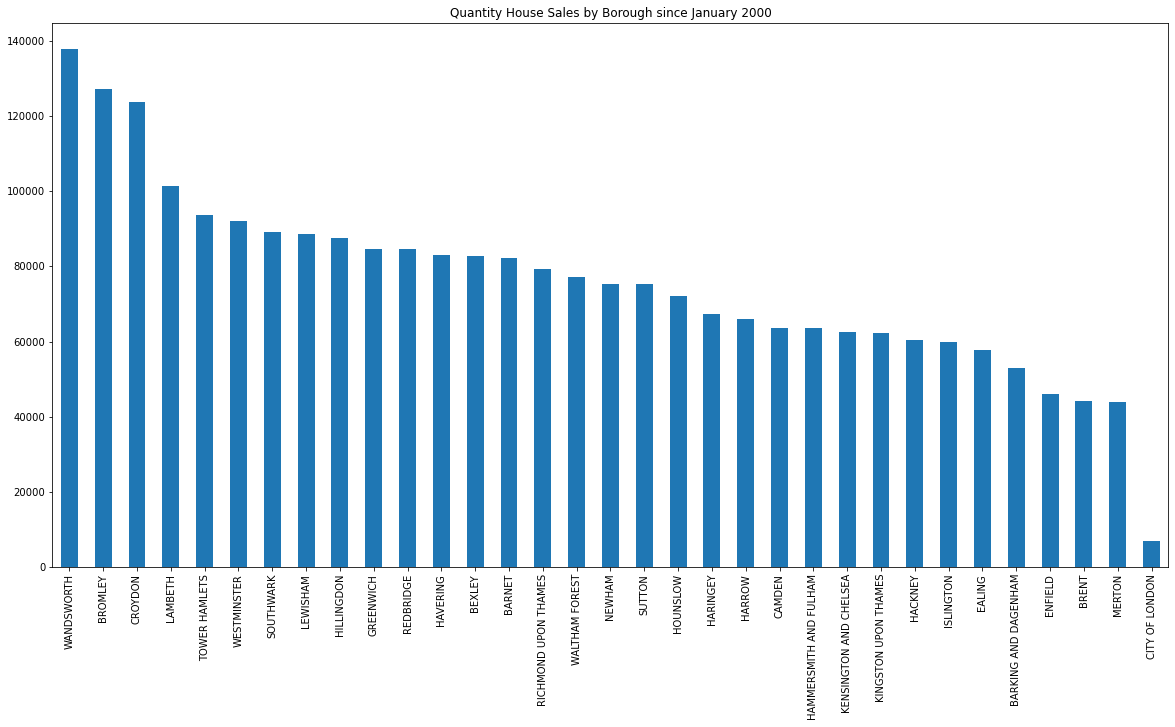

In [25]:
# I will now review the counts again, see where this dataset stands
plt.figure(figsize=(20,10))
new['district'].value_counts().plot(kind='bar', title='Quantity House Sales by Borough since January 2000')

In [29]:
for col in new.columns:
    print(col)
    print(new[col].isna().sum())

unique_id
0
price_paid
0
deed_date
0
postcode
5011
property_type
0
new_build
0
estate_type
0
saon
1624041
paon
39
street
1057
locality
1379534
town
0
district
0
county
0
transaction_category
0
linked_data
0


In [30]:
new.dropna(subset=['postcode'], inplace=True)

In [31]:
for col in new.columns:
    print(col)
    print(new[col].isna().sum())

unique_id
0
price_paid
0
deed_date
0
postcode
0
property_type
0
new_build
0
estate_type
0
saon
1622014
paon
39
street
974
locality
1375453
town
0
district
0
county
0
transaction_category
0
linked_data
0


As I am only interested in the first part of the post code and not going to the next level of detail using the second half, I will create a new column by extracting this information from the post code column.

In [35]:
new[['zip','Last']] = new.postcode.str.split(" ",1, expand=True,)
new.head()

,unique_id,price_paid,deed_date,postcode,property_type,new_build,estate_type,saon,paon,street,locality,town,district,county,transaction_category,linked_data,zip,Last
0,10BACA68-F56C-47CE-906B-4D9CD4FEF39A,123000,27/01/2000,E1 0AF,F,N,L,NaN,408,CABLE STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...,E1,0AF
1,F6339A0D-34F8-44DD-AC6B-AE266FC884EE,80000,28/09/2001,E1 0AJ,F,N,L,FLAT 8,DONOVAN HOUSE,CABLE STREET,LONDON,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...,E1,0AJ
2,73441E21-34A6-444A-B5DA-310A673CC3F6,60000,21/06/2000,E1 0AR,F,N,L,FLAT 12,MOORE HOUSE,CABLE STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...,E1,0AR
3,1C1202B4-E202-45B7-B7B3-BFA7A1A1E05B,61000,18/02/2000,E1 0AU,F,N,L,FLAT 29,GOSLING HOUSE,SUTTON STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...,E1,0AU
4,B81AB99F-86F1-4E82-8622-1F26359BD594,73500,12/04/2001,E1 0AZ,F,N,L,FLAT 32,FOLEY HOUSE,TARLING STREET,LONDON,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...,E1,0AZ


In [34]:
new.postcode

0        E1 0AF
1        E1 0AJ
2        E1 0AR
3        E1 0AU
4        E1 0AZ
          ...  
72040    W6 0YF
72041    W6 0YF
72042    W6 0YF
72043    W6 0YF
72044    W7 1AF
Name: postcode, Length: 2490509, dtype: object

In [39]:
new['Month'] = pd.DatetimeIndex(new['deed_date'])
new['month_year'] = pd.to_datetime(new['Month']).dt.to_period('M')

In [40]:
new.head()

,unique_id,price_paid,deed_date,postcode,property_type,new_build,estate_type,saon,paon,street,locality,town,district,county,transaction_category,linked_data,zip,Last,Month,month_year
0,10BACA68-F56C-47CE-906B-4D9CD4FEF39A,123000,27/01/2000,E1 0AF,F,N,L,NaN,408,CABLE STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...,E1,0AF,2000-01-27,2000-01
1,F6339A0D-34F8-44DD-AC6B-AE266FC884EE,80000,28/09/2001,E1 0AJ,F,N,L,FLAT 8,DONOVAN HOUSE,CABLE STREET,LONDON,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...,E1,0AJ,2001-09-28,2001-09
2,73441E21-34A6-444A-B5DA-310A673CC3F6,60000,21/06/2000,E1 0AR,F,N,L,FLAT 12,MOORE HOUSE,CABLE STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...,E1,0AR,2000-06-21,2000-06
3,1C1202B4-E202-45B7-B7B3-BFA7A1A1E05B,61000,18/02/2000,E1 0AU,F,N,L,FLAT 29,GOSLING HOUSE,SUTTON STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...,E1,0AU,2000-02-18,2000-02
4,B81AB99F-86F1-4E82-8622-1F26359BD594,73500,12/04/2001,E1 0AZ,F,N,L,FLAT 32,FOLEY HOUSE,TARLING STREET,LONDON,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...,E1,0AZ,2001-12-04,2001-12


In [41]:
print(f'We have {new.zip.nunique()} different post codes in our dataset for London.')

We have 300 different post codes in our dataset for London.


In [106]:
new[new['month_year']>'2021-05']

,unique_id,price_paid,deed_date,postcode,property_type,new_build,estate_type,saon,paon,street,locality,town,district,county,transaction_category,linked_data,zip,Last,Month,month_year
47,C3C3F9B6-9A45-362B-E053-6B04A8C03ACC,3215000,2021-09-04,E1 0BL,O,N,F,NaN,212,CABLE STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,B,http://landregistry.data.gov.uk/data/ppi/trans...,E1,0BL,2021-09-04,2021-09
84,BEF7EBBF-1C2B-7A76-E053-6B04A8C092F7,630000,2021-08-01,E1 0ED,F,N,F,NaN,30,TARBERT WALK,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...,E1,0ED,2021-08-01,2021-08
205,C18F412A-B78D-81A6-E053-6B04A8C0AD18,665000,2021-10-03,E1 0NQ,T,N,F,NaN,50,BELGRAVE STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...,E1,0NQ,2021-10-03,2021-10
230,C3C3F9B5-9F64-362B-E053-6B04A8C03ACC,407500,2021-10-02,E1 0QA,F,N,L,NaN,2,OLD CHURCH ROAD,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...,E1,0QA,2021-10-02,2021-10
575,C18F412A-B94A-81A6-E053-6B04A8C0AD18,1050000,2021-11-02,E1 2AN,T,N,F,NaN,6,WALDEN STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...,E1,2AN,2021-11-02,2021-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71146,C3C3F9B6-0FAA-362B-E053-6B04A8C03ACC,415000,2021-12-03,W4 5RH,F,N,L,FLAT 1,MORTLAKE HOUSE,CHISWICK HIGH ROAD,NaN,LONDON,HOUNSLOW,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...,W4,5RH,2021-12-03,2021-12
71258,C6209F5E-CFA4-295E-E053-6C04A8C0DDCC,761500,2021-11-03,W4 5SB,F,N,L,GROUND FLOOR FLAT,39,THORNEY HEDGE ROAD,NaN,LONDON,HOUNSLOW,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...,W4,5SB,2021-11-03,2021-11
71265,C6209F5F-9073-295E-E053-6C04A8C0DDCC,1607000,2021-09-02,W4 5SB,T,N,F,NaN,43,THORNEY HEDGE ROAD,NaN,LONDON,HOUNSLOW,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...,W4,5SB,2021-09-02,2021-09
71554,C6209F5E-D3F3-295E-E053-6C04A8C0DDCC,405000,2021-09-04,W4 5UW,F,N,L,NaN,24,ALFRED CLOSE,NaN,LONDON,HOUNSLOW,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...,W4,5UW,2021-09-04,2021-09


In [107]:
from scipy import stats

no_outliers = new[(np.abs(stats.zscore(new['price_paid'])) < 3)].copy()

no_outliers = no_outliers[no_outliers['month_year']<'2021-06'].copy()
no_outliers['price_paid'].describe()

count    2.478273e+06
mean     3.983625e+05
std      4.411119e+05
min      1.000000e+00
25%      1.865000e+05
50%      2.800000e+05
75%      4.500000e+05
max      6.517240e+06
Name: price_paid, dtype: float64

In [42]:
new.to_csv('final.csv')

In [ ]:
Create a new dataframe, averaging each zip by the start of the month.

In [108]:

no_outliers['deed_date'] = pd.to_datetime(no_outliers['deed_date'])
s = no_outliers.groupby(['zip',pd.Grouper(key='deed_date', freq='MS')])['price_paid'].mean()

df1 = (s.reset_index(level=0)
        .groupby('zip')['price_paid']
        .apply(lambda x: x.asfreq('MS'))
        .reset_index()
        )

In [79]:
df1.head(25)

,zip,deed_date,price_paid
0,BR1,2000-01-01,188510.882353
1,BR1,2000-02-01,166975.060606
2,BR1,2000-03-01,166774.318182
3,BR1,2000-04-01,184542.528090
4,BR1,2000-05-01,164167.565789
5,BR1,2000-06-01,181809.621212
6,BR1,2000-07-01,184954.597561
7,BR1,2000-08-01,196793.846154
8,BR1,2000-09-01,183029.313725
9,BR1,2000-10-01,146346.542373


In [80]:
df1.isna().sum()

zip              0
deed_date        0
price_paid    8947
dtype: int64

In [81]:
df1.groupby('zip').head()

,zip,deed_date,price_paid
0,BR1,2000-01-01,188510.882353
1,BR1,2000-02-01,166975.060606
2,BR1,2000-03-01,166774.318182
3,BR1,2000-04-01,184542.528090
4,BR1,2000-05-01,164167.565789
...,...,...,...
73078,WD3,2000-01-01,155000.000000
73079,WD3,2000-02-01,NaN
73080,WD3,2000-03-01,NaN
73081,WD3,2000-04-01,NaN


In [82]:
len(df1)

73342

In [83]:
print(f'We have {df1.zip.nunique()} different post codes in our dataset for London.')

We have 300 different post codes in our dataset for London.


## Facebook Prophet Modeling

I will test the modelling phase on one postcode

<AxesSubplot:>

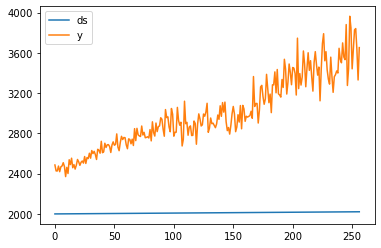

In [109]:
br1 = df1[df1['zip']=='BR1'].copy()
br1.drop('zip', axis=1, inplace=True)
br1.columns = ['ds', 'y']
#br1.set_index('ds', inplace=True)
br1.head()
br1.plot()

In [110]:
br1.tail()

,ds,y
252,2021-01-01,678702.567568
253,2021-02-01,683534.651163
254,2021-03-01,606612.500000
255,2021-04-01,496954.545455
256,2021-05-01,614408.333333


In [68]:
br1.describe()

,price_paid
count,2.640000e+02
mean,4.475413e+05
std,7.007040e+05
min,1.463465e+05
25%,2.820000e+05
50%,3.519109e+05
75%,4.836741e+05
max,1.063078e+07


In [88]:
from fbprophet import Prophet as proph

In [96]:
br1.head()

,ds,y
0,2000-01-01,188510.882353
1,2000-02-01,166975.060606
2,2000-03-01,166774.318182
3,2000-04-01,184542.528090
4,2000-05-01,164167.565789


In [100]:
br1.tail()

,ds,y
259,2021-08-01,656187.500000
260,2021-09-01,598966.666667
261,2021-10-01,584625.000000
262,2021-11-01,688750.000000
263,2021-12-01,438041.666667


In [111]:
Model = proph(interval_width=0.95)

In [112]:
# Fit the timeseries to Model
Model.fit(br1)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [113]:
future_dates = Model.make_future_dataframe(periods=48, freq='MS')
future_dates.tail()

,ds
300,2025-01-01
301,2025-02-01
302,2025-03-01
303,2025-04-01
304,2025-05-01


In [114]:
# Predict the values for future dates and take the head of forecast
forecast = Model.predict(future_dates)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2000-01-01,176987.249841,91940.078116,252461.218218,176987.249841,176987.249841,-6076.324614,-6076.324614,-6076.324614,-6076.324614,-6076.324614,-6076.324614,0.0,0.0,0.0,170910.925227
1,2000-02-01,178553.974410,103136.807894,264746.439605,178553.974410,178553.974410,4657.863359,4657.863359,4657.863359,4657.863359,4657.863359,4657.863359,0.0,0.0,0.0,183211.837769
2,2000-03-01,180019.619974,120897.831395,275123.941302,180019.619974,180019.619974,17766.019234,17766.019234,17766.019234,17766.019234,17766.019234,17766.019234,0.0,0.0,0.0,197785.639208
3,2000-04-01,181586.344542,83538.342106,241181.541169,181586.344542,181586.344542,-17964.502727,-17964.502727,-17964.502727,-17964.502727,-17964.502727,-17964.502727,0.0,0.0,0.0,163621.841816
4,2000-05-01,183102.529608,88045.396250,239923.142100,183102.529608,183102.529608,-18479.197364,-18479.197364,-18479.197364,-18479.197364,-18479.197364,-18479.197364,0.0,0.0,0.0,164623.332245


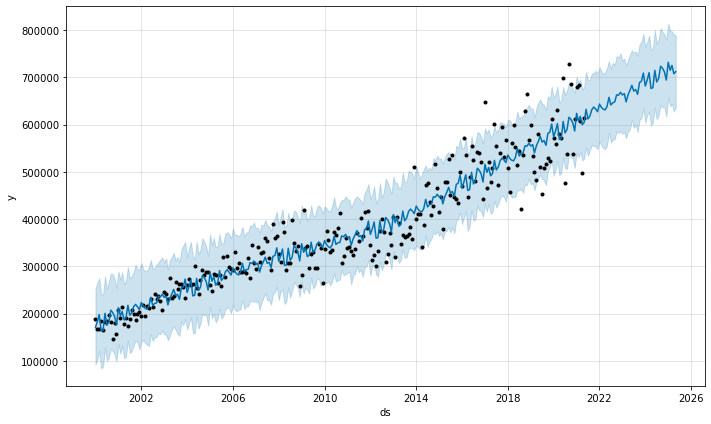

In [115]:
Model.plot(forecast, uncertainty=True)
plt.show()

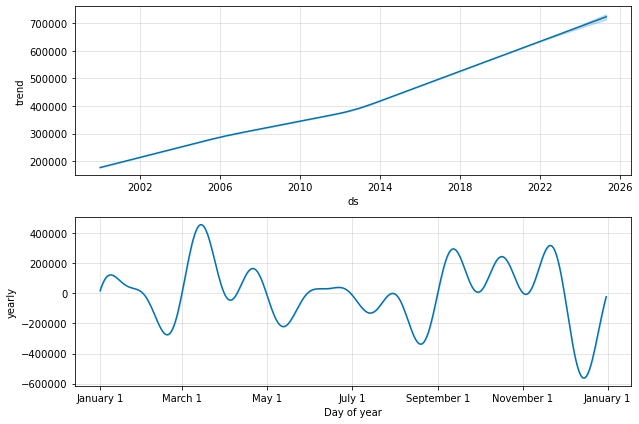

In [116]:
# Plot model components 
Model.plot_components(forecast)
plt.show()

In [118]:
import itertools
p = d = q = range(0,2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p,d,q))

# Generate all different combinations of seasonal p, q and q triplets (use 12 for frequency)
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [ ]:
import statsmodels.api as sm
#Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(co2,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

In [124]:
br1_sar = br1.set_index('ds')
br1_sar = br1_sar['y']

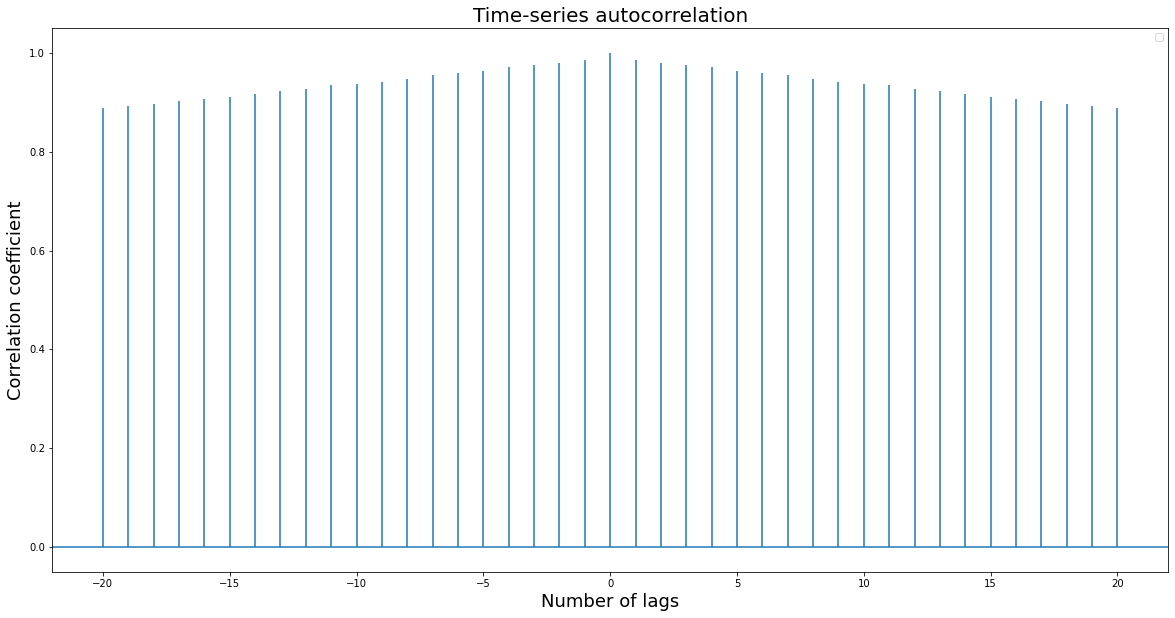

In [129]:
plt.figure(figsize=(20,10))
plt.acorr(x=br1_sar.values,maxlags=20)
plt.xlabel("Number of lags", fontsize='18')
plt.ylabel("Correlation coefficient", fontsize='18')
plt.title("Time-series autocorrelation", fontsize='20')

plt.legend(loc='best')
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)
plt.show()

In [126]:
br1_sar.values

array([188510.88235294, 166975.06060606, 166774.31818182, 184542.52808989,
       164167.56578947, 181809.62121212, 184954.59756098, 196793.84615385,
       183029.31372549, 146346.54237288, 179883.43283582, 157578.48148148,
       207478.52830189, 189995.45454545, 213111.75789474, 178452.84313725,
       189863.83333333, 173522.67045455, 187611.4025974 , 208478.40659341,
       199864.09090909, 187232.27848101, 198268.17647059, 202974.89361702,
       195444.11764706, 219150.        , 194113.74358974, 215636.54639175,
       211584.11290323, 231111.35869565, 213169.40659341, 240920.64655172,
       229915.05376344, 237977.1375    , 226433.92553191, 208491.2804878 ,
       245587.36111111, 241985.19607843, 231179.63768116, 274469.86567164,
       233014.48717949, 236218.46875   , 267410.29411765, 252035.54455446,
       261870.51724138, 262326.06410256, 255531.88888889, 233893.31578947,
       260990.66176471, 272423.8       , 260159.02597403, 263272.42307692,
       301249.80769231, 2

In [123]:
br1_sar

,y
ds,
2000-01-01,188510.882353
2000-02-01,166975.060606
2000-03-01,166774.318182
2000-04-01,184542.528090
2000-05-01,164167.565789
...,...
2021-01-01,678702.567568
2021-02-01,683534.651163
2021-03-01,606612.500000


<ipython-input-131-05a703390047>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposistion=seasonal_decompose(br1_sar,freq=12)


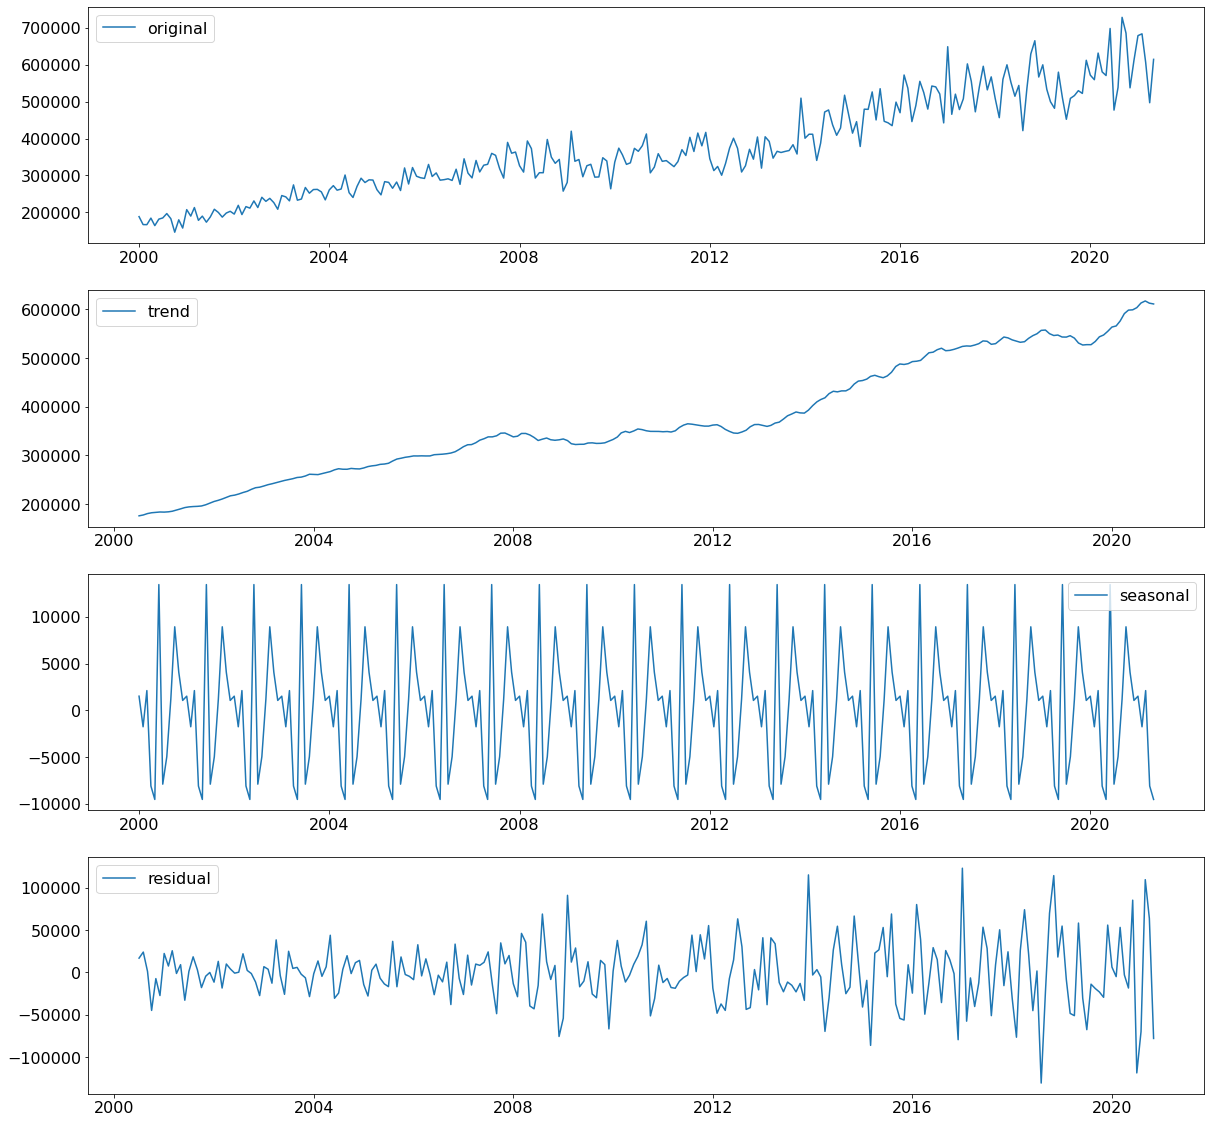

In [131]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposistion=seasonal_decompose(br1_sar,freq=12)

trend=decomposistion.trend
seasonal=decomposistion.seasonal
residual=decomposistion.resid
plt.figure(figsize=(20,20))
plt.subplot(411)
plt.plot(br1_sar,label='original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='residual')
plt.legend(loc='best')

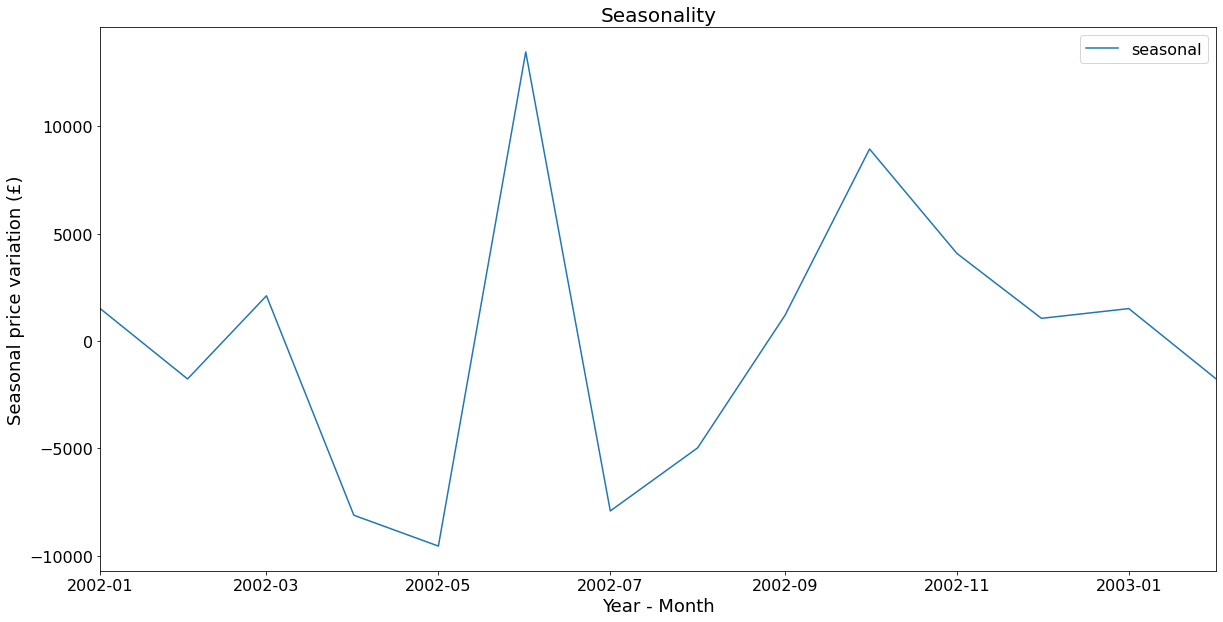

In [136]:
import datetime
import matplotlib.dates as dates
plt.figure(figsize=(20,10))
plt.plot(seasonal,label='seasonal')
plt.xlim(dates.date2num([seasonal.index[24], seasonal.index[37]]))
plt.xlabel("Year - Month", fontsize='18')
plt.ylabel("Seasonal price variation (£)", fontsize='18')
plt.title("Seasonality", fontsize='20')

plt.legend(loc='best')
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)
plt.show()

In [138]:

# Using groupby to find the seasonal trend for each year
seasonal=seasonal.reset_index()
seasonal['Year']=seasonal['ds'].dt.year
seasonal_year=seasonal.groupby('Year')

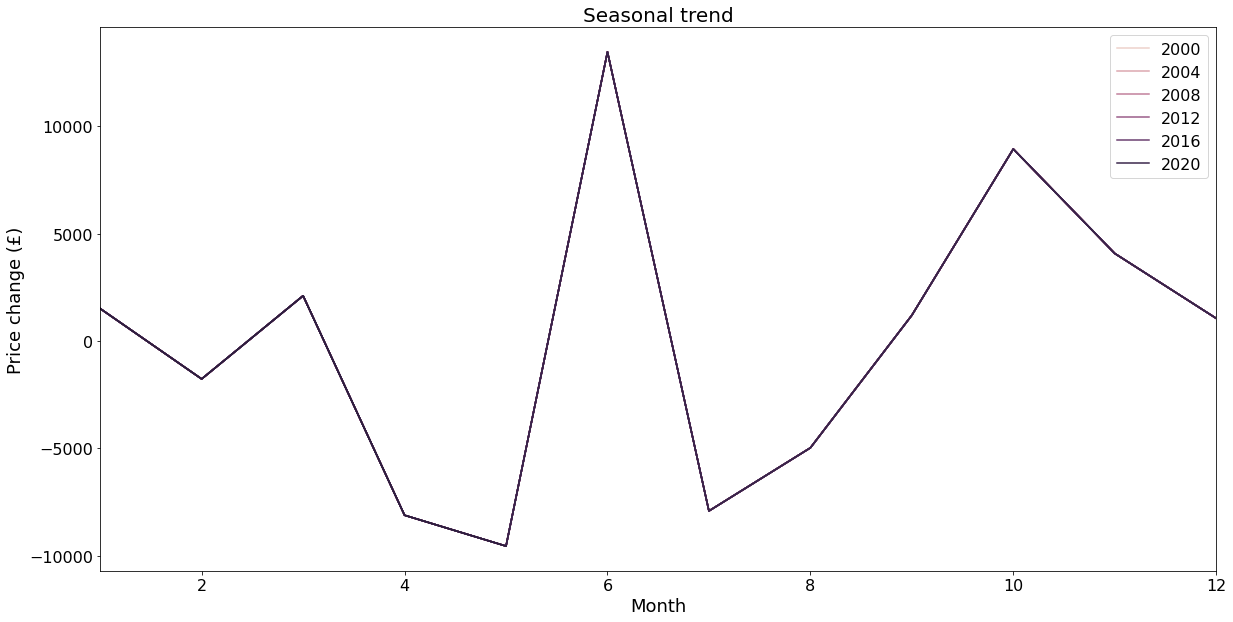

In [139]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.lineplot(x=(seasonal['ds'].dt.month),y=seasonal['seasonal'],hue='Year',data=seasonal);

plt.xlabel("Month", fontsize='18')
plt.ylabel("Price change (£)", fontsize='18')
plt.title("Seasonal trend", fontsize='20')
plt.xlim([1,12])
plt.legend(loc='best')
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)
plt.legend(loc='best')
plt.show()


In [140]:
#Train-test split, 20 years of training data and 5 years of test data
br1_sar_train=br1_sar[br1_sar.index[0]:( br1_sar.index[br1_sar.index.get_loc('2016-01-01', method='nearest')])]
br1_sar_test=br1_sar[ br1_sar.index[br1_sar.index.get_loc('2015-7-30', method='nearest')]:br1_sar.index[-1]]

In [143]:
import statsmodels.api as sm
#Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(br1_sar_train,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-pa

ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =5421.753308445712
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =4983.38709613577
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =4407.518727099683


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =4116.776675631918
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =4413.296127568787


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =4380.455771403944
ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =4135.350647208033


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =4111.913354056642
ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =5264.934362332543
ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =4911.093572309214

C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =4378.8514472105


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =4079.599004134291
ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =4939.488485635469


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =4886.582938032643
ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated =4118.046884167634


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated =4071.4963269834734
ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated =4602.715325177451


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated =4319.606870764719
ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated =4464.207425737577


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated =4075.2173396153175
ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated =4341.004359203211


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated =4320.095324236972


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated =4118.089889197043


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated =4057.4407000997476


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated =4501.672054921928


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated =4226.4387175480015


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated =4346.993839275476


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated =4002.575880192918
ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated =4272.885145453183


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated =4228.135513455038
ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated =4060.2624097094003


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated =3999.242131365625
ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =4627.9270564211365
ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =4344.064162456043
ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =4400.520656846742

C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-pa


ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =4088.4343542971683

C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =4398.0314089467465

C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =4344.492948364939


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =4078.9323484784786


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =4077.313377843725


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =4519.074154948524


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =4243.467367979107


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =4365.465889938343


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =4019.43930452769


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =4266.636301521162


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =4245.327680739872


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated =4055.2271425711697


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated =4016.269039528889
ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated =4567.053833676151
ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated =4289.819688061327


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-pa

ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated =4418.503439258077


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated =4056.610119332575
ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated =4289.535119456626


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated =4290.945797842622


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated =4070.402409951441


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated =4053.001529420724
ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated =4503.040679736556


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated =4227.742444280957


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated =4348.985490653403


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated =4004.4850700506627


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated =4251.272800210784


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated =4229.412469063076
ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated =4037.949661263194


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated =4000.8337245877246


In [144]:
# Find the parameters with minimal AIC value
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]


pdq         (0, 1, 1)
pdqs    (1, 1, 1, 12)
aic           3999.24
Name: 31, dtype: object

C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


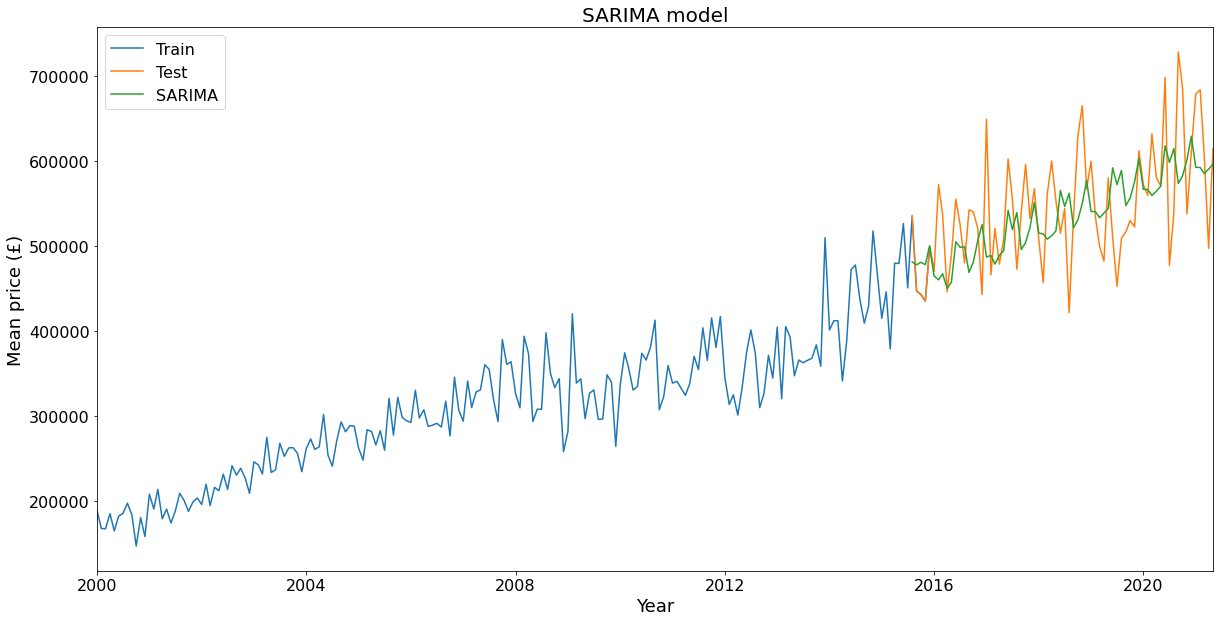

In [145]:

import statsmodels.api as sm
from datetime import datetime
#SARIMA
y_hat_avg = br1_sar_test.copy()
fit2 = sm.tsa.statespace.SARIMAX(br1_sar_train, order=(0, 1, 1),seasonal_order=(1,1,1,12)).fit()
y_hat_avg['SARIMA'] = fit2.predict(start=br1_sar_test.index[0],end=br1_sar_test.index[-1])
plt.figure(figsize=(20,10))
plt.plot( br1_sar_train, label='Train')
plt.plot(br1_sar_test, label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.xlabel("Year", fontsize='18')
plt.xlim(dates.date2num([br1_sar_train.index[0], br1_sar_test.index[-1]]))
plt.ylabel("Mean price (£)", fontsize='18')
plt.title("SARIMA model", fontsize='20')

plt.legend(loc='best')
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)
plt.show()

In [146]:
#Creating a test date set of future dates
br1_test_future=br1_sar_test
br1_test_future.index=br1_test_future.index+pd.DateOffset(years=5)

C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


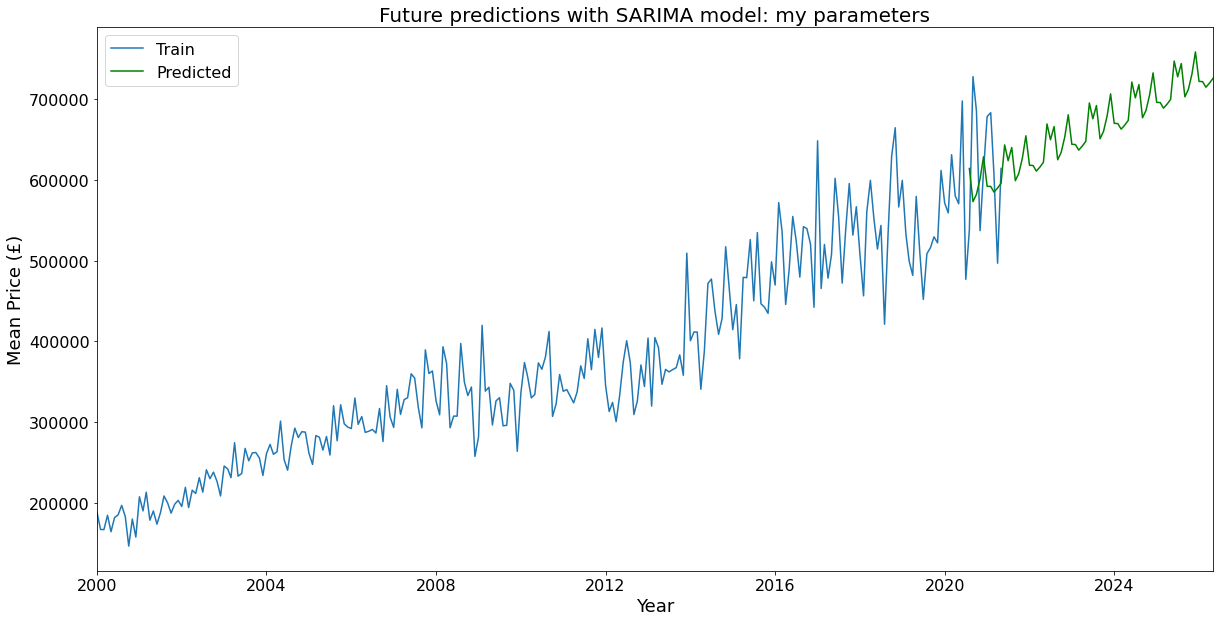

In [150]:
y_hat_avg_future = br1_test_future.copy()
fit_future = sm.tsa.statespace.SARIMAX(br1_sar, order=(1, 1, 1),seasonal_order=(1,1,1,12)).fit()
y_hat_avg_future['SARIMA'] = fit2.predict(start=br1_test_future.index[0],end=br1_test_future.index[-1])
plt.figure(figsize=(20,10))
plt.plot( br1_sar, label='Train')
plt.plot(y_hat_avg_future['SARIMA'], label='Predicted', color='g')
plt.legend(loc='best')
plt.xlabel("Year", fontsize='18')
plt.xlim(dates.date2num([br1_sar_train.index[0], br1_test_future.index[-1]]))
plt.ylabel("Mean Price (£)", fontsize='18')
plt.title("Future predictions with SARIMA model: my parameters", fontsize='20')

plt.legend(loc='best')
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)
plt.show()

In [151]:
# Plug the optimal parameter values into a new SARIMAX model
model = sm.tsa.statespace.SARIMAX(br1_sar,order=(0,1,1),seasonal_order=(1,1,1,12),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

# Fit the model and print results
output = model.fit()

C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [152]:
print(output.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8078      0.069    -11.701      0.000      -0.943      -0.673
ar.S.L12      -0.1996      0.154     -1.294      0.196      -0.502       0.103
ma.S.L12      -0.6548      0.129     -5.078      0.000      -0.908      -0.402
sigma2      3.965e+09   8.64e-12   4.59e+20      0.000    3.97e+09    3.97e+09


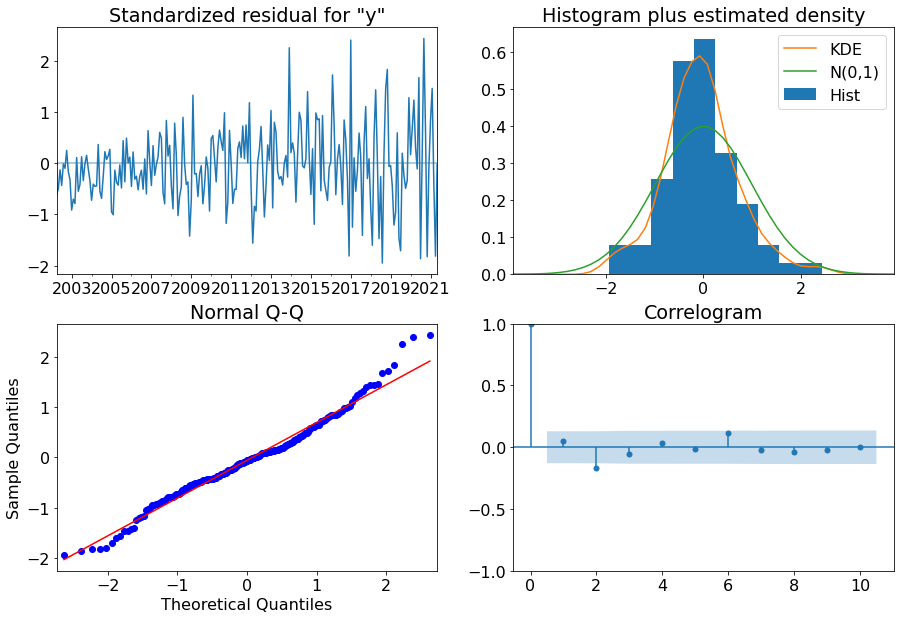

In [153]:
# Call plot_diagnostics() on the results calculated above 
fig=output.plot_diagnostics(figsize=(15,10))

# One Step Ahead

In [160]:
# Get predictions starting from 01-01-1998 and calculate confidence intervals
pred = output.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)
pred_conf = pred.conf_int()

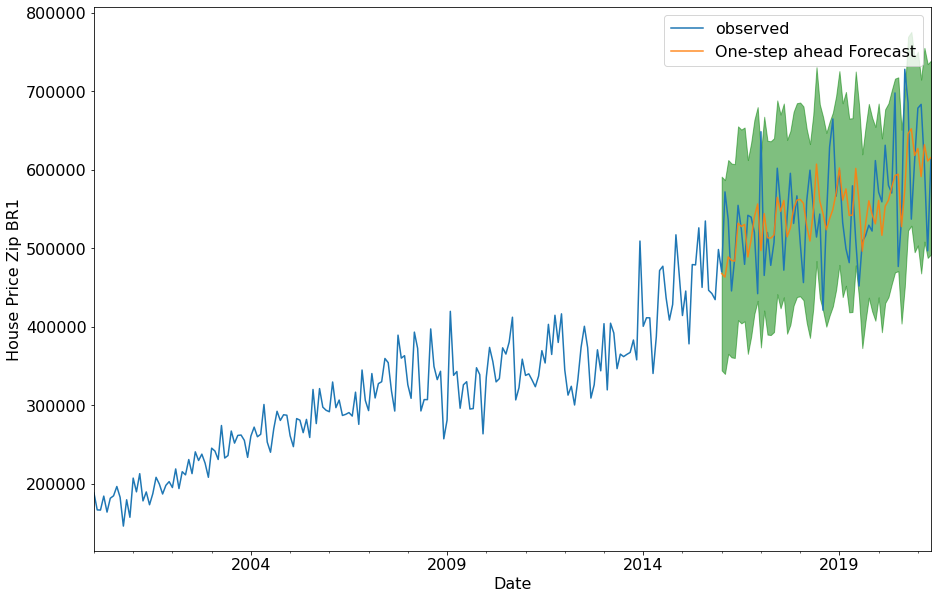

In [161]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 10

# Plot observed values
ax = br1_sar['2000':].plot(label='observed')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('House Price Zip BR1')
plt.legend()

plt.show()

In [163]:
# Get the real and predicted values
br1_forecasted = pred.predicted_mean
br1_truth = br1_sar['2000-01-01':]

# Compute the mean square error
mse = ((br1_forecasted - br1_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 4400660736.04


# Dynamic

In [162]:
# Get dynamic predictions with confidence intervals as above 
pred_dynamic = output.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=True, full_history=True)
pred_dynamic_conf = pred_dynamic.conf_int()

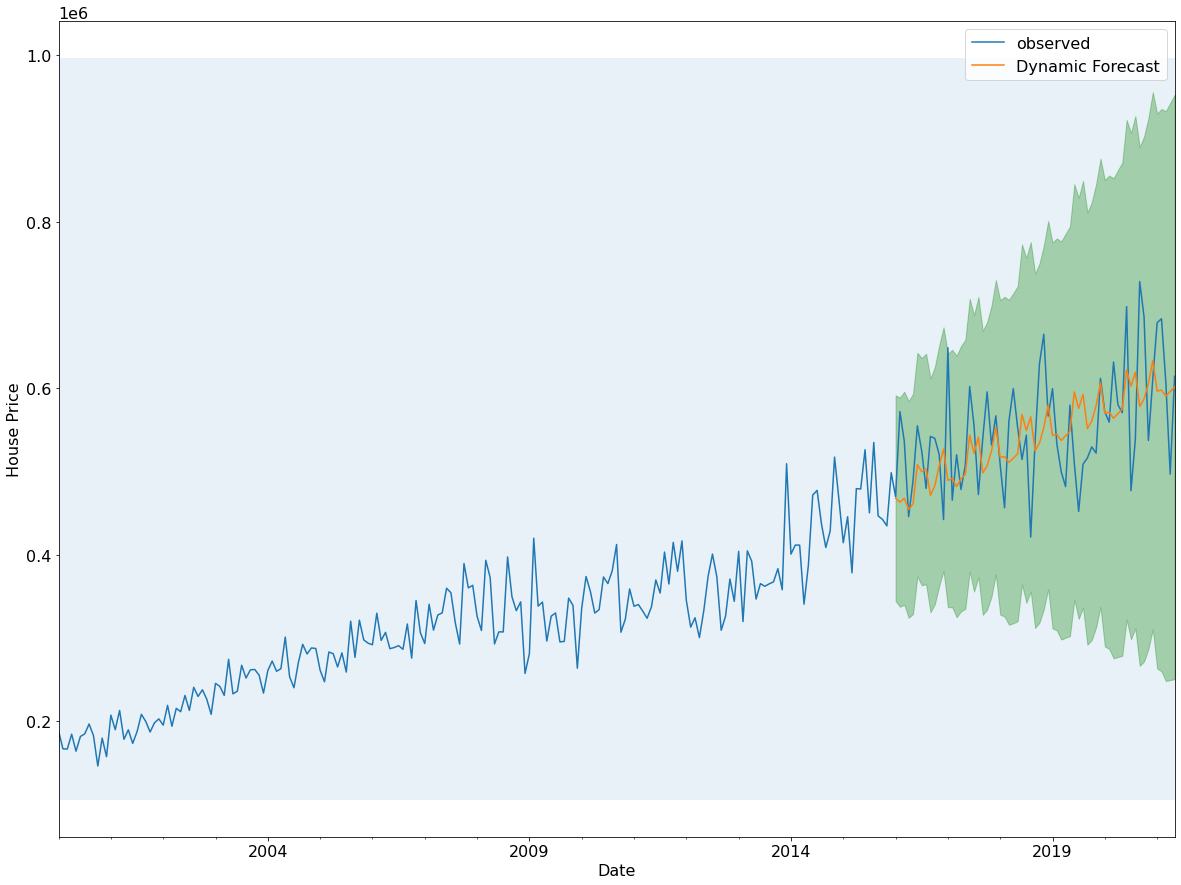

In [167]:
# Plot the dynamic forecast with confidence intervals as above
ax = br1_sar['2000':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2000-01-01'), br1_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('House Price')

plt.legend()